<a href="https://colab.research.google.com/github/HiteshAI/Plant_Classification/blob/master/cloud_organization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from google.colab import drive
from pathlib import Path
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nulllpointer","key":"e5993e229894fa107e1a840e2f11ec71"}'}

In [8]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [9]:
path= '/content/drive/My Drive/cloud_formation'
path = Path(path)
data_path = path/'cloud_formation_dataset'
model_path= path/'models'
!kaggle competitions download -c understanding_cloud_organization -p /content/drive/My\ Drive/cloud_formation/cloud_formation_dataset


100% 3.44G/3.44G [00:37<00:00, 95.4MB/s]
100% 3.44G/3.44G [00:37<00:00, 98.0MB/s]
100% 2.30G/2.30G [00:38<00:00, 40.8MB/s]
100% 2.30G/2.30G [00:38<00:00, 63.9MB/s]
 90% 49.0M/54.2M [00:02<00:00, 18.4MB/s]
100% 54.2M/54.2M [00:03<00:00, 18.8MB/s]
  0% 0.00/321k [00:00<?, ?B/s]
100% 321k/321k [00:00<00:00, 21.3MB/s]


In [0]:
!unzip -q -n /content/drive/My\ Drive/cloud_formation/cloud_formation_dataset/train.csv.zip -d /content/drive/My\ Drive/cloud_formation/cloud_formation_dataset/

In [0]:
!chmod +777 '/content/drive/My Drive/cloud_formation/cloud_formation_dataset/train.csv'

In [0]:
!unzip -q -n /content/drive/My\ Drive/cloud_formation/cloud_formation_dataset/train_images.zip -d /content/drive/My\ Drive/cloud_formation/cloud_formation_dataset/train

In [0]:
!unzip -q -n /content/drive/My\ Drive/cloud_formation/cloud_formation_dataset/test_images.zip -d /content/drive/My\ Drive/cloud_formation/cloud_formation_dataset/test

In [0]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
import pandas as pd
from fastai.metrics import error_rate
from fastai.callbacks import *
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D



In [0]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [63]:
from fastai.utils.show_install import show_install; show_install()



```text
=== Software === 
python        : 3.6.8
fastai        : 1.0.58
fastprogress  : 0.1.21
torch         : 1.3.0+cu100
nvidia driver : 418.67
torch cuda    : 10.0.130 / is available
torch cudnn   : 7603 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 11441MB | Tesla K80

=== Environment === 
platform      : Linux-4.14.137+-x86_64-with-Ubuntu-18.04-bionic
distro        : #1 SMP Thu Aug 8 02:47:02 PDT 2019
conda env     : Unknown
python        : /usr/bin/python3
sys.path      : 
/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be installed with:
pip install distro
Once installed, re

In [22]:
df = pd.read_csv(data_path/'train.csv')
df.head()

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


In [52]:
path= '/content/drive/My Drive/cloud_formation'
path = Path(path)
data_path = path/'cloud_formation_dataset'
model_path= path/'models'
path_test = data_path/'test'
path_img = data_path/'train'
data_path


PosixPath('/content/drive/My Drive/cloud_formation/cloud_formation_dataset')

5546
3698
torch.Size([1, 1400, 2100])


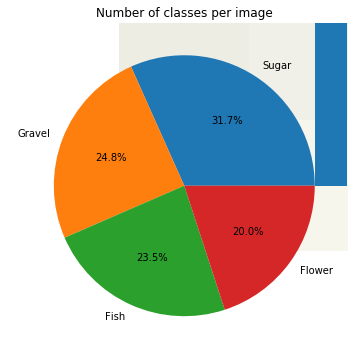

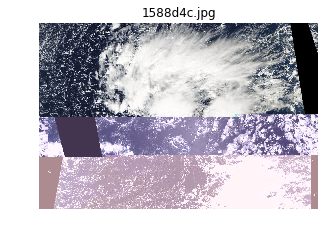

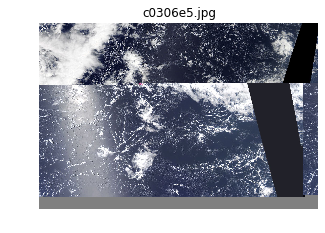

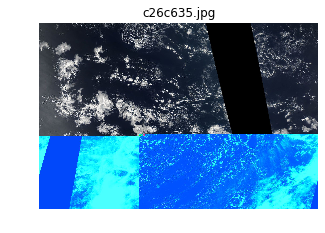

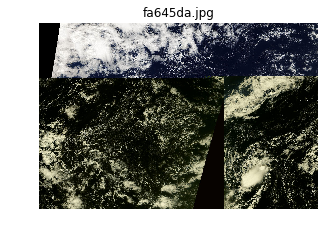

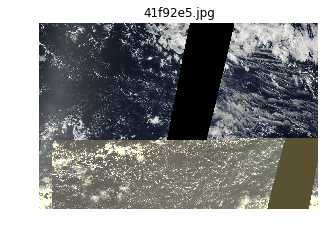

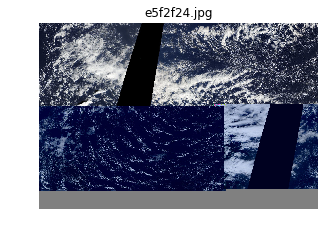

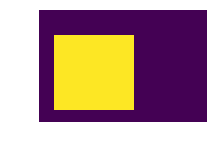

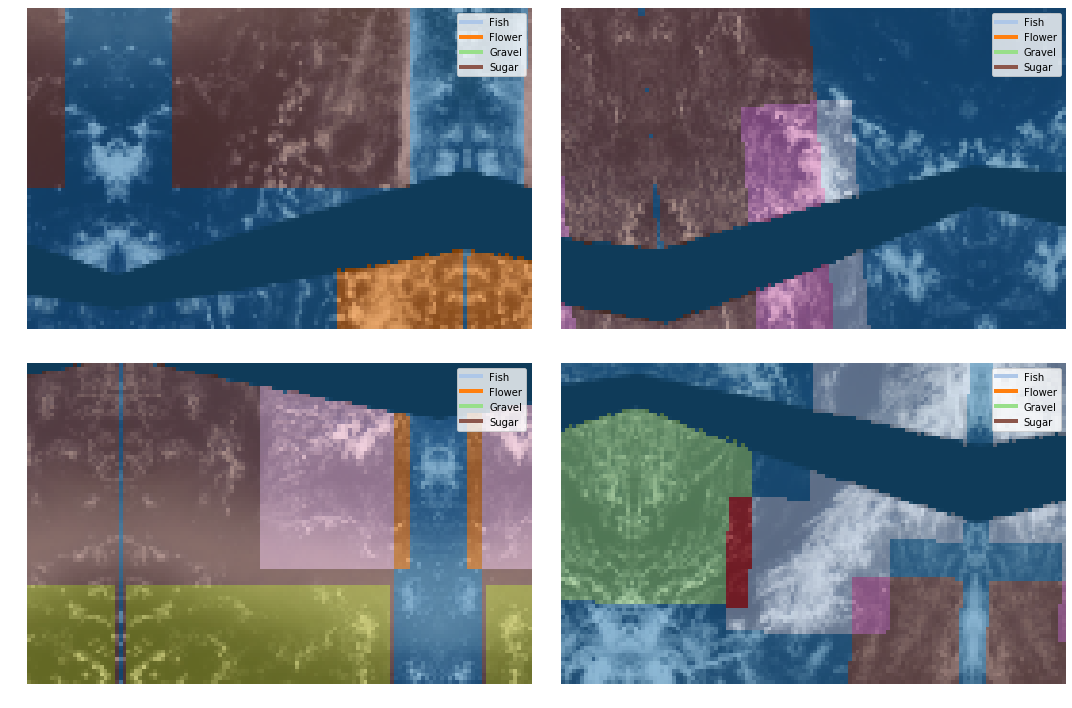

In [73]:
# path = Path("/kaggle/input/understanding_cloud_organization")
# path.ls()
# [PosixPath('/kaggle/input/understanding_cloud_organization/sample_submission.csv'),
#  PosixPath('/kaggle/input/understanding_cloud_organization/train.csv'),
#  PosixPath('/kaggle/input/understanding_cloud_organization/train_images'),
#  PosixPath('/kaggle/input/understanding_cloud_organization/test_images')]
# path_img = path/"train_images"

fnames_train = get_image_files(path_img)
fnames_train[:3]
print(len(fnames_train))

fnames_test = get_image_files(path_test)
fnames_test[:3]
print(len(fnames_test))
img_f = fnames_train[1]
img = open_image(img_f)
img.show(figsize=(10, 10))

def split_img_label(img_lbl):
    """Return image and label from file name like '0011165.jpg_Flower'"""
    s = img_lbl.split("_")
    assert len(s) == 2
    return s[0], s[1]
train = pd.read_csv(f'{data_path}/train.csv')

# split Image_Label
train["Image"] = train["Image_Label"].apply(lambda img_lbl: split_img_label(img_lbl)[0])
train["Label"] = train["Image_Label"].apply(lambda img_lbl: split_img_label(img_lbl)[1])
del train["Image_Label"]

train.head()
train_with_mask = train.dropna(subset=["EncodedPixels"])
ax = train_with_mask["Label"].value_counts().plot(kind="pie", autopct='%1.1f%%', title="Shares of each classes", figsize=(10, 6))

class_counts = train.dropna(subset=["EncodedPixels"]).groupby("Image")["Label"].nunique()
ax = class_counts.plot(kind="hist", title="Number of classes per image")

# pivot to have one row per image and masks as columns
train = train.pivot(index='Image', columns='Label', values='EncodedPixels')
assert len(train) == len(fnames_train) # sanity check
train.head()

def show_img_fn(fname, figsize=(10, 10)):
    img = open_image(fname)
    img.show(figsize=figsize)    

def show_img_info(fname):
    show_img_fn(path_img/fname)
    display(train.loc[[fname]])   


unusual_imgs = ["1588d4c.jpg", "c0306e5.jpg", "c26c635.jpg", "fa645da.jpg", "41f92e5.jpg", "e5f2f24.jpg"]

for fname in unusual_imgs:
    img = open_image(path_img/fname)
    img.show(figsize=(5, 5), title=fname)     

train_img_dims = (1400, 2100)  # Train and test images are 1400x2100 pixels


def rle_to_mask(rle, shape):
    mask_img = open_mask_rle(rle, shape)
    mask = mask_img.px.permute(0, 2, 1)
    return mask
def mask_to_rle(mask):
    """Convert binary `mask` to RLE string"""
    return rle_encode(mask.numpy().T)
def test_mask_rle():
    """test case for mask RLE encode/decode"""
    mask_rle = train.iloc[0]["Fish"]    
    mask = rle_to_mask(mask_rle, train_img_dims)
    mask_rle_enc = mask_to_rle(mask)
    assert mask_rle_enc == mask_rle
    
    print(mask.shape)
    Image(mask).show()
    
test_mask_rle()
torch.Size([1, 1400, 2100])

item_list = (SegmentationItemList.
             from_df(df=train.reset_index(), path=path_img, cols="Image")
             .use_partial_data(sample_pct=0.1)  # use only a subset of data to speedup tests
             .split_by_rand_pct(0.2))
class MultiLabelImageSegment(ImageSegment):
    """Store overlapping masks in separate image channels"""

    def show(self, ax:plt.Axes=None, figsize:tuple=(3,3), title:Optional[str]=None, hide_axis:bool=True,
        cmap:str='tab20', alpha:float=0.5, class_names=None, **kwargs):
        "Show the masks on `ax`."
             
        # put all masks into a single channel
        flat_masks = self.px[0:1, :, :].clone()
        for idx in range(1, self.shape[0]): # shape CxHxW
            mask = self.px[idx:idx+1, :, :] # slice tensor to a single mask channel
            # use powers of two for class codes to keep them distinguishable after sum 
            flat_masks += mask * 2**idx
        
        # use same color normalization in image and legend
        norm = matplotlib.colors.Normalize(vmin=0, vmax=2**self.shape[0]-1)
        ax = show_image(Image(flat_masks), ax=ax, hide_axis=hide_axis, cmap=cmap, norm=norm,
                        figsize=figsize, interpolation='nearest', alpha=alpha, **kwargs)
        
        # custom legend, see https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
        cm = matplotlib.cm.get_cmap(cmap)
        legend_elements = []
        for idx in range(self.shape[0]):
            c = 2**idx
            label = class_names[idx] if class_names is not None else f"class {idx}"
            line = Line2D([0], [0], color=cm(norm(c)), label=label, lw=4)
            legend_elements.append(line)
        ax.legend(handles=legend_elements)
        
        # debug info
        # ax.text(10, 10, f"px={self.px.size()}", {"color": "white"})
        
        if title: ax.set_title(title)

    def reconstruct(self, t:Tensor): 
        return MultiClassImageSegment(t)
# source: https://forums.fast.ai/t/unet-how-to-get-4-channel-output/54674/4
def bce_logits_floatify(input, target, reduction='mean'):
    return F.binary_cross_entropy_with_logits(input, target.float(), reduction=reduction)

    
class MultiLabelSegmentationLabelList(SegmentationLabelList):
    """Return a single image segment with all classes"""
    # adapted from https://forums.fast.ai/t/how-to-load-multiple-classes-of-rle-strings-from-csv-severstal-steel-competition/51445/2
    
    def __init__(self, items:Iterator, src_img_size=None, classes:Collection=None, **kwargs):
        super().__init__(items=items, classes=classes, **kwargs)
        self.loss_func = bce_logits_floatify
        self.src_img_size = src_img_size
        # add attributes to copy by new() 
        self.copy_new += ["src_img_size"]
    
    def open(self, rles):        
        # load mask at full resolution
        masks = torch.zeros((len(self.classes), *self.src_img_size)) # shape CxHxW
        for i, rle in enumerate(rles):
            if isinstance(rle, str):  # filter out NaNs
                masks[i] = rle_to_mask(rle, self.src_img_size)
        return MultiLabelImageSegment(masks)
    
    def analyze_pred(self, pred, thresh:float=0.0):
        # binarize masks
        return (pred > thresh).float()
    
    def reconstruct(self, t:Tensor): 
        return MultiLabelImageSegment(t)
class_names = ["Fish", "Flower", "Gravel", "Sugar"]
def get_masks_rle(img):
    """Get RLE-encoded masks for this image"""
    img = img.split("/")[-1]  # get filename only
    return train.loc[img, class_names].to_list()
# reduce image size
# img_size = tuple(v // 16 for v in train_img_dims)
img_size = (84, 132)  # use multiple of 4

classes = [0, 1, 2, 3] # no need for a "void" class: if a pixel isn't in any mask, it is not labelled
item_list = item_list.label_from_func(func=get_masks_rle, label_cls=MultiLabelSegmentationLabelList, 
                                      classes=classes, src_img_size=train_img_dims)
# add unlabelled test images
# set empty RLE string as label to produce empty multi-label masks and allow reconstruct() and show()
item_list = item_list.add_test_folder(path_test, label="")
batch_size = 8

# TODO add data augmentation
tfms = ([], [])
tfms = get_transforms(do_flip=True, flip_vert=True, max_warp=0., max_zoom=1.1, max_lighting=0.2)
# tfms = get_transforms()

item_list = item_list.transform(tfms, tfm_y=True, size=img_size)
data = (item_list
        .databunch(bs=batch_size)
        .normalize(imagenet_stats) # use same stats as pretrained model
       )  
assert data.test_ds is not None
data.show_batch(2, figsize=(15, 10), class_names=class_names)


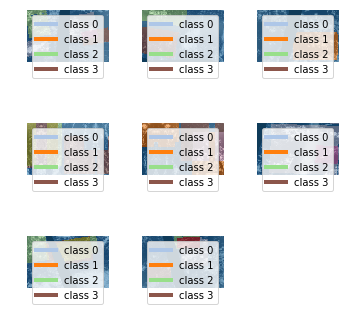

In [58]:
data.c
data.show_batch(rows=3, figsize=(5,5))


In [0]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

In [89]:
arch = models.vgg19_bn
learn = unet_learner(data, arch, model_dir= model_path , metrics=[acc_02, fbeta], callback_fns=[partial(EarlyStoppingCallback, min_delta=0.01, patience=5)])

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:05<00:00, 99.3MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


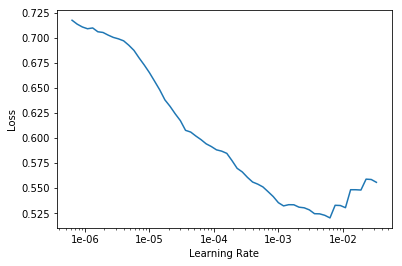

In [90]:
learn.lr_find()
learn.recorder.plot()

In [91]:
lr = (1e-5)
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.549881,0.464301,0.697397,0.094354,01:49
1,0.466822,0.455604,0.715935,0.105620,01:44
2,0.443165,0.438436,0.688927,0.143011,01:53
3,0.431282,0.437951,0.730502,0.112226,01:43
4,0.422819,0.434713,0.722338,0.126004,01:43


In [92]:
learn.save('stage-1-test', return_path=True)

PosixPath('/content/drive/My Drive/cloud_formation/models/stage-1-test.pth')

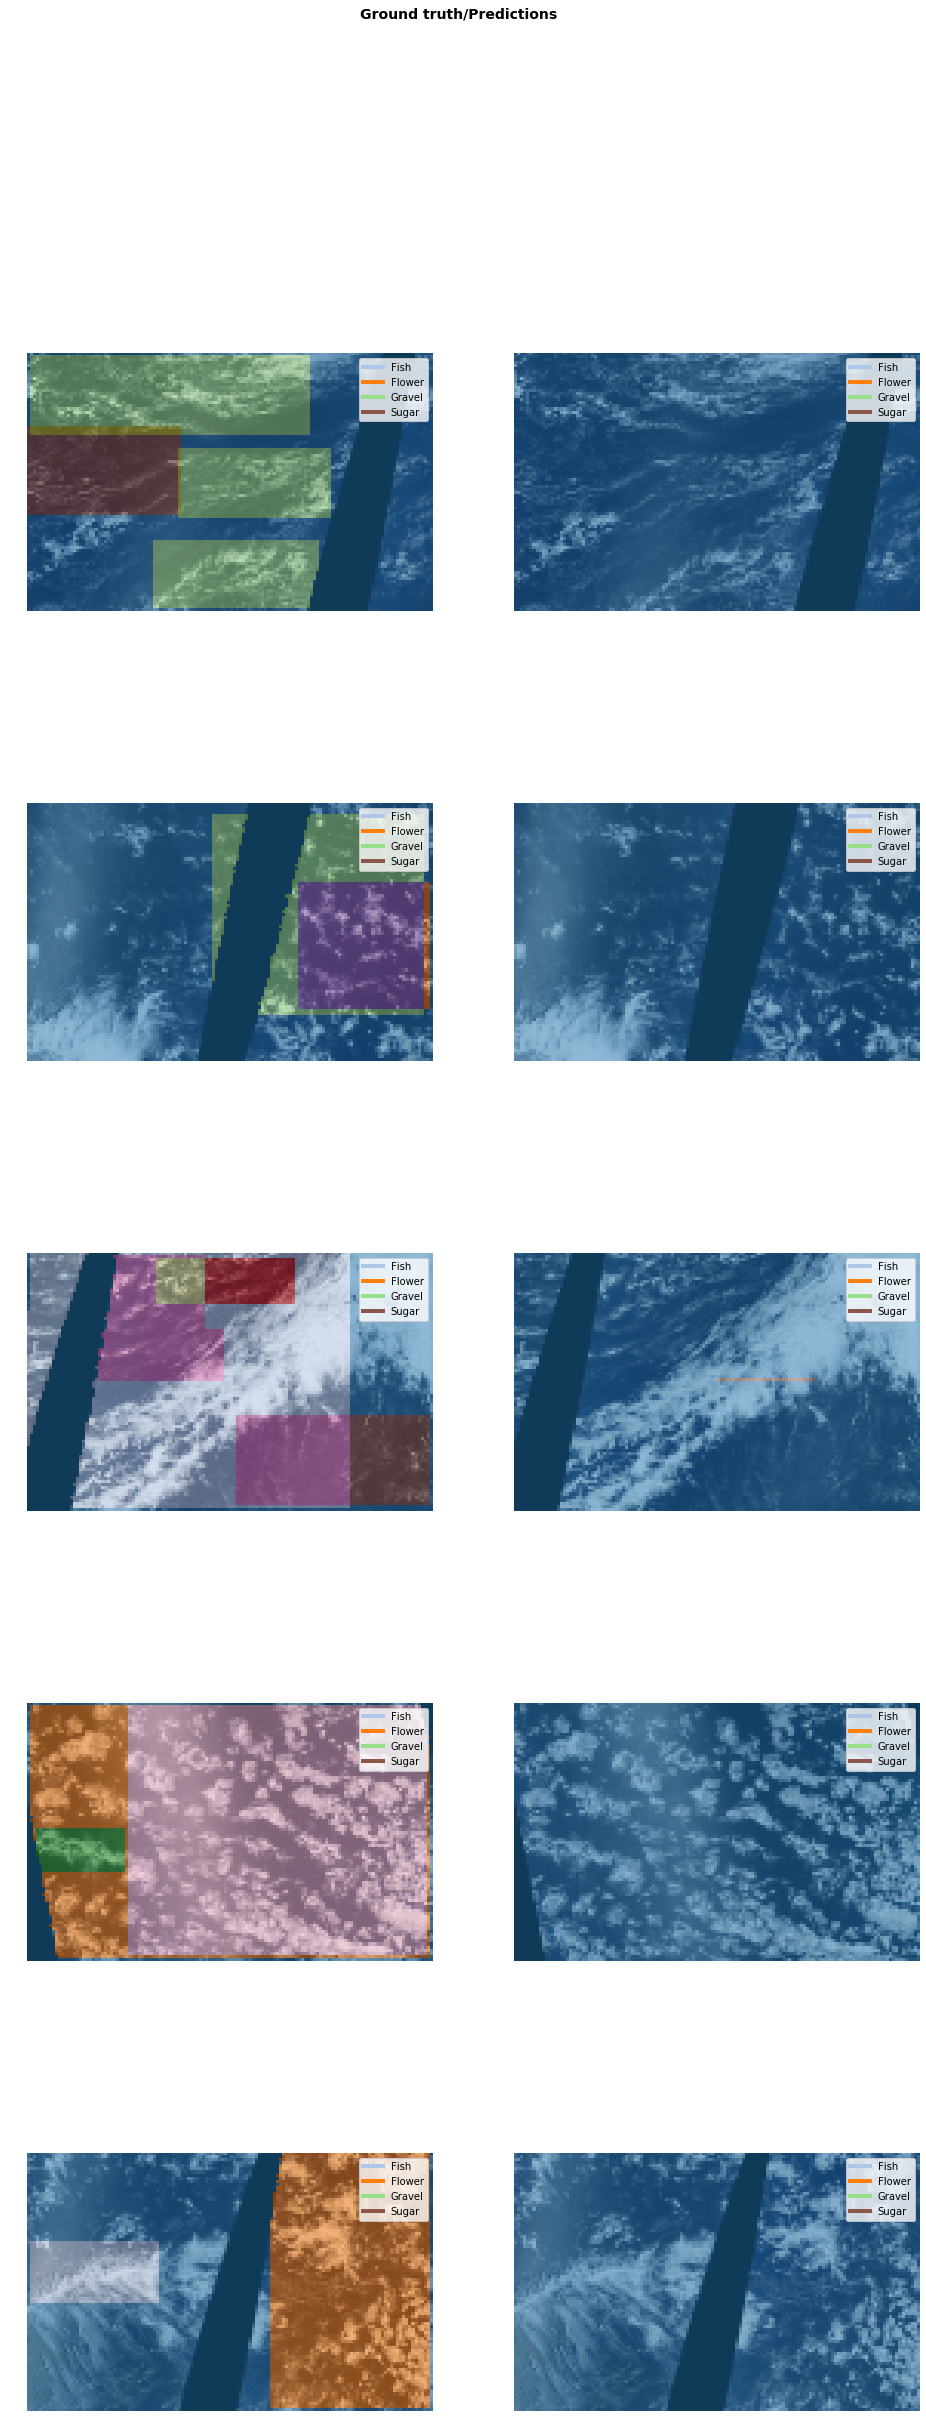

In [93]:
learn.show_results(imgsize=8, class_names=class_names)

In [0]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test, with_loss=False)

In [95]:
preds.shape

torch.Size([3698, 4, 84, 132])

In [0]:
from datetime import datetime
from tqdm import tqdm
def fmt_now():
    return datetime.today().strftime('%Y%m%d-%H%M%S')

In [104]:
def resize_pred_masks(preds, shape=(4, 350, 525)):
    """Resize predicted masks and return them as a generator"""
    for p in range(preds.shape[0]):
        mask = MultiLabelImageSegment(preds[p])
        yield mask.resize(shape)
pred_masks = resize_pred_masks(preds)

test_fnames = [p.name for p in data.test_dl.items]
len(test_fnames)

def write_submission_file(filename, test_fnames, preds, threshold=0):
    with open(filename, mode='w') as f:
        f.write("Image_Label,EncodedPixels\n")

        for img_name, masks in zip(tqdm(test_fnames), resize_pred_masks(preds)):
            binary_masks = masks.px > threshold # TODO use activation instead
            
            for class_idx, class_name in enumerate(class_names):
                rle = mask_to_rle(binary_masks[class_idx])
                f.write(f"{img_name}_{class_name},{rle}\n")

    print(f"Wrote '{f.name}'.")
submission_file = f"{fmt_now()}_submission_hero.csv"
write_submission_file(submission_file, test_fnames, preds)

100%|██████████| 3698/3698 [00:24<00:00, 151.17it/s]

Wrote '20191021-101308_submission_hero.csv'.


In [108]:
! kaggle competitions submit understanding_cloud_organization -f {submission_file} -m "My first submission to kaggle"

100% 922k/922k [00:01<00:00, 491kB/s] 
Successfully submitted to Understanding Clouds from Satellite Images